In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to load dataset iris
df=pd.read_csv('/content/drive/MyDrive/notebook/iris.csv')

In [3]:
#to show first 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


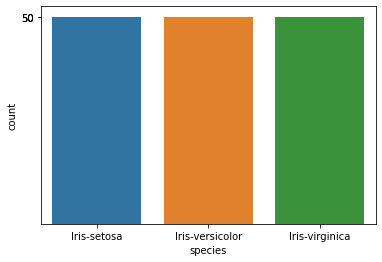

In [4]:
#How many species (species is a target variable)
sns.countplot(data=df,x="species")
f=df["species"].value_counts()
plt.yticks(f)
plt.show()

In [5]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
#check datatypes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
#check
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


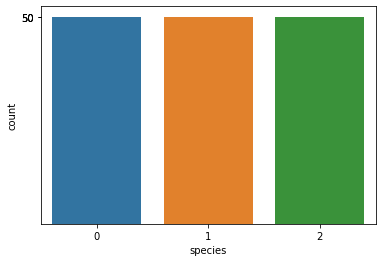

In [8]:
sns.countplot(data=df,x="species")
f=df["species"].value_counts()
plt.yticks(f)
plt.show()

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [10]:
#select input and output
X=df.drop("species",axis=1)
Y=df["species"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [12]:
X_train.shape

(105, 4)

In [13]:
Y_train.value_counts()

0    35
2    35
1    35
Name: species, dtype: int64

In [14]:
Y_test.value_counts()

2    15
0    15
1    15
Name: species, dtype: int64

In [15]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [16]:
#create a neural network
#create a object of Sequential class and pass the list of layers
'''
import tensorflow as tf
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=2,activation='relu',input_shape=(X.shape[1],)),
#hidden layer1
tf.keras.layers.Dense(units=3,activation='relu'), #hidden layer2
tf.keras.layers.Dense(units=3,activation='softmax') #output layer
])
'''

"\nimport tensorflow as tf\nmodel=tf.keras.Sequential([\n  tf.keras.layers.Dense(units=2,activation='relu',input_shape=(X.shape[1],)),\n#hidden layer1\ntf.keras.layers.Dense(units=3,activation='relu'), #hidden layer2\ntf.keras.layers.Dense(units=3,activation='softmax') #output layer\n])\n"

In [17]:
#compile the model

#model.compile(optimizer='adam',loss="sparse_categorical_crossentropy")

In [18]:
#Train the model
#trained_model=model.fit(X_train,Y_train,epochs=50,batch_size=20)

In [19]:
#Testing the model
#Y_pred=model.predict(X_test)

In [20]:
#print(Y_pred)

In [21]:
#select class of maximum prob. for each sample 
#Y_pred = Y_pred.argmax(axis=1)
#print(Y_pred)

In [22]:
'''
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
'''

'\nfrom sklearn.metrics import classification_report\nfrom sklearn.metrics import confusion_matrix\nprint(classification_report(Y_test,Y_pred))\nprint(confusion_matrix(Y_test,Y_pred))\n'

In [23]:
#pip install keras

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# Build the model

#from keras.models import Sequential
#from keras.layers import Dense

#from keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam

#import tensorflow as tf


#from tensorflow import keras
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
#optimizer =keras.optimizers.Adam(lr=0.001)
#model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
trained_model=model.fit(X_train, Y_train, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(X_test,Y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
21/21 [==============================] - 0s 1ms/step - loss: 1.4047 - accuracy: 0.3333
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 1.2569 - accuracy: 0.3714
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 1.1629 - accura

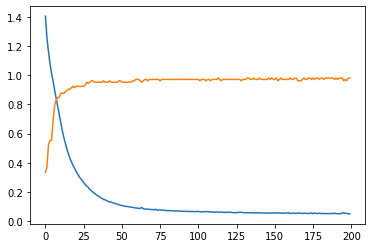

In [27]:
plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["accuracy"])
plt.show()

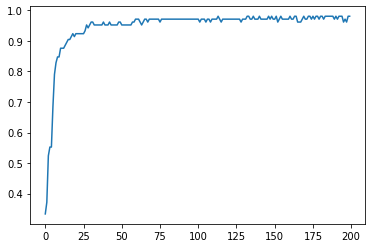

In [28]:
plt.plot(trained_model.history["accuracy"])
plt.show()